In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
# Re-create the "sales_data.csv" by including more metrics related to buying behaviors

raw_data = pd.read_csv('ifood.csv')

sales_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
    'MntTotal', 'MntRegularProds', 'NumDealsPurchases', 
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
    'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
    'AcceptedCmpOverall'
]

sales_data = raw_data[sales_columns]

output_file_path = '/Users/mac/Desktop/DATA 110/Final Project/F24_DATA110/Project/F1/sales_data.csv'
sales_data.to_csv(output_file_path, index=False)

output_file_path

'/Users/mac/Desktop/DATA 110/Final Project/F24_DATA110/Project/F1/sales_data.csv'

In [14]:
sales_data = pd.read_csv('sales_data.csv')
sales_data

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,MntRegularProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmpOverall
0,635,88,546,172,88,88,1529,1441,3,8,10,4,7,0,0,0,0,0,0
1,11,1,6,2,1,6,21,15,2,1,1,2,5,0,0,0,0,0,0
2,426,49,127,111,21,42,734,692,1,8,2,10,4,0,0,0,0,0,0
3,11,4,20,10,3,5,48,43,2,2,0,4,6,0,0,0,0,0,0
4,173,43,118,46,27,15,407,392,5,5,3,6,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,709,43,182,42,118,247,1094,847,2,9,3,4,5,0,0,0,0,0,0
2201,406,0,30,0,0,8,436,428,7,8,2,5,7,0,0,0,1,0,1
2202,908,48,217,32,12,24,1217,1193,1,2,3,13,6,0,1,0,0,0,1
2203,428,30,214,80,30,61,782,721,2,6,5,10,3,0,0,0,0,0,0


**Heat Map for Correlation**

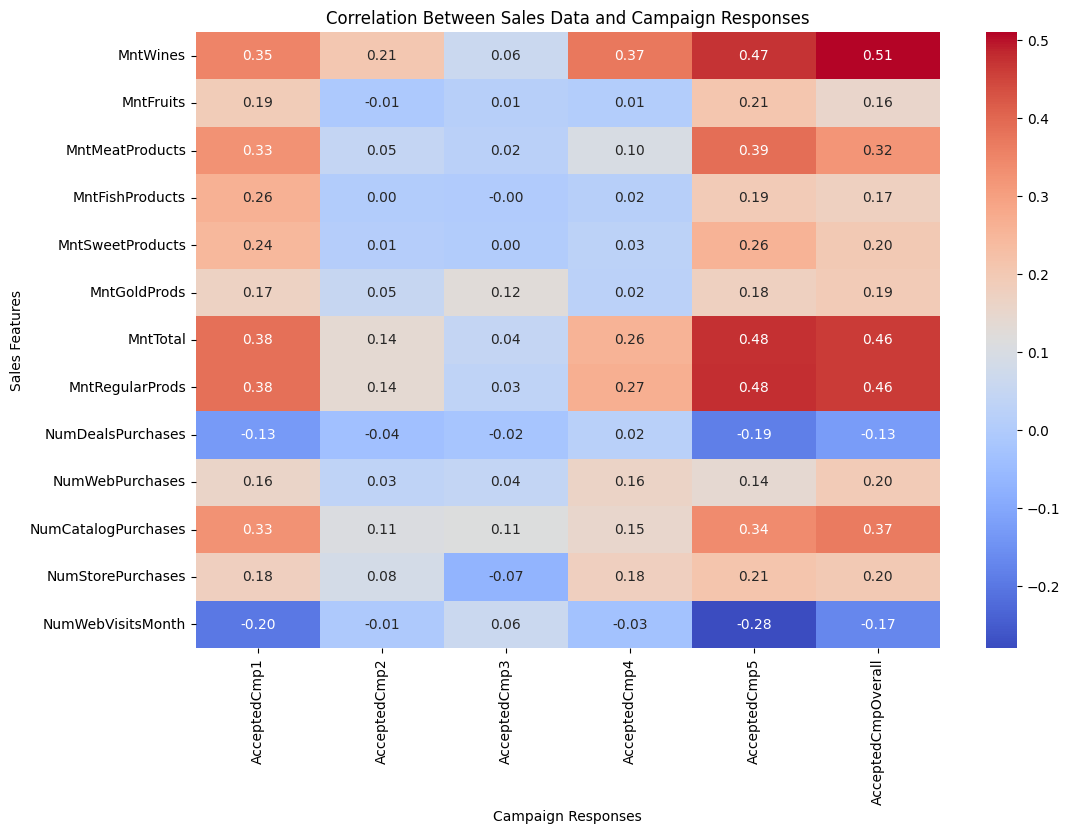

In [15]:
# Heatmap for the correlation between all sales metrics and all campaigns

sales_data = pd.read_csv('sales_data.csv')

sales_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'MntTotal', 'MntRegularProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth'
]
campaign_columns = [
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
    'AcceptedCmpOverall'
]

correlation_matrix = sales_data[sales_columns + campaign_columns].corr()
correlation_with_campaigns = correlation_matrix.loc[sales_columns, campaign_columns]

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_with_campaigns, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Between Sales Data and Campaign Responses')
plt.xlabel('Campaign Responses')
plt.ylabel('Sales Features')
plt.show()

**Decision Tree Building**

In [16]:
sales_data = pd.read_csv('sales_data.csv')

# Prepare the data
X = sales_data.drop(columns=['AcceptedCmpOverall'], errors='ignore')
y = sales_data['AcceptedCmpOverall']

# Define the function to train a decision tree classifier and evaluate performance
def tree_classifier_level(i, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    
    return clf.score(X_train, y_train), clf.score(X_test, y_test), accuracy

# Define the function to find the best depth for the decision tree
def find_best_depth():
    train_scores = []
    test_scores = []
    accuracy_list = []
    total_score = {
        "Depth": range(1, 21)
    }
    total_score = pd.DataFrame(total_score)
    
    for i in range(1, 21):
        train_score, test_score, accuracy = tree_classifier_level(i, X, y)
        train_scores.append(train_score)
        test_scores.append(test_score)
        accuracy_list.append(accuracy)
        total_score.loc[total_score["Depth"] == i, "Total Score"] = abs(train_score - test_score)
    
    return total_score.loc[total_score["Total Score"].idxmin()]["Depth"], train_scores, test_scores, accuracy_list

**Best Depth and Visualization**

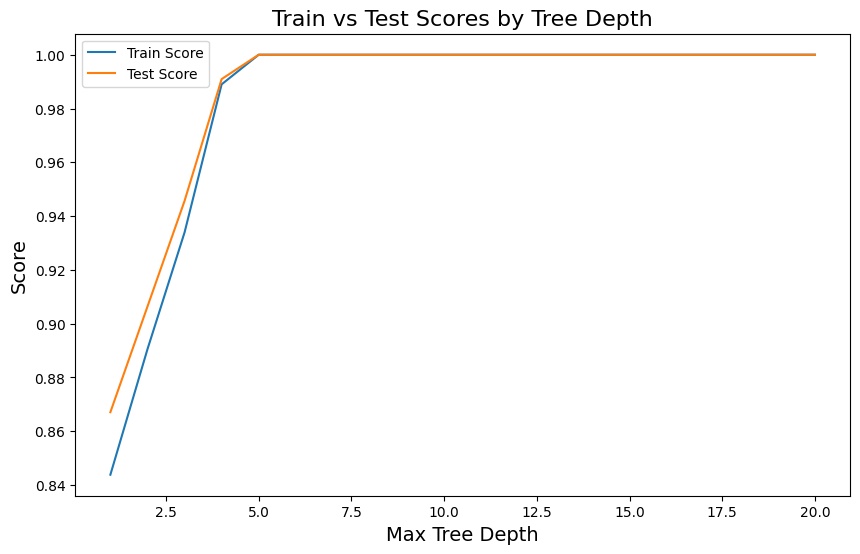

In [17]:
# Find the best depth and visualize results
finc_res = find_best_depth()
train_scores, test_scores, accuracy_list = finc_res[1], finc_res[2], finc_res[3]

# Visualization of train and test scores vs tree depth
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 21), y=train_scores, label='Train Score')
sns.lineplot(x=range(1, 21), y=test_scores, label='Test Score')
plt.xlabel('Max Tree Depth', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Train vs Test Scores by Tree Depth', fontsize=16)
plt.legend()
plt.show()

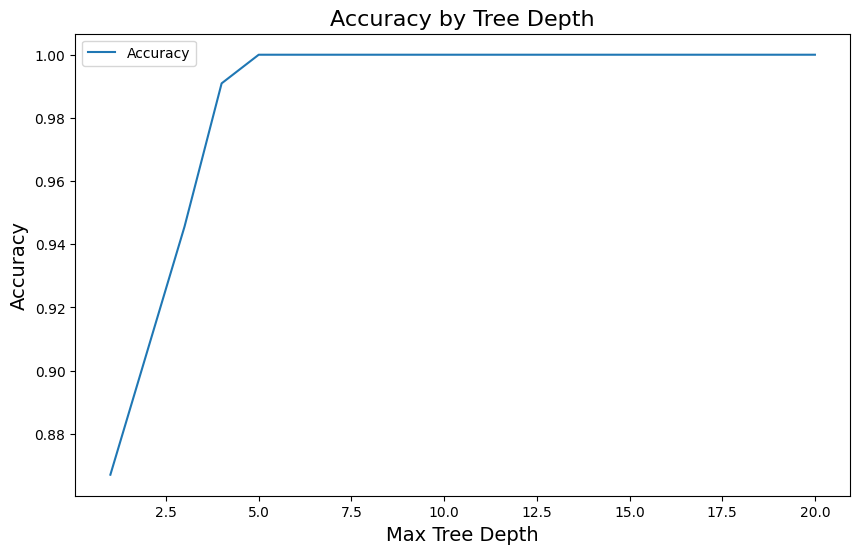

In [18]:
# Accuracy visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 21), y=accuracy_list, label='Accuracy')
plt.xlabel('Max Tree Depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy by Tree Depth', fontsize=16)
plt.legend()
plt.show()

**Image of The Decision Tree**

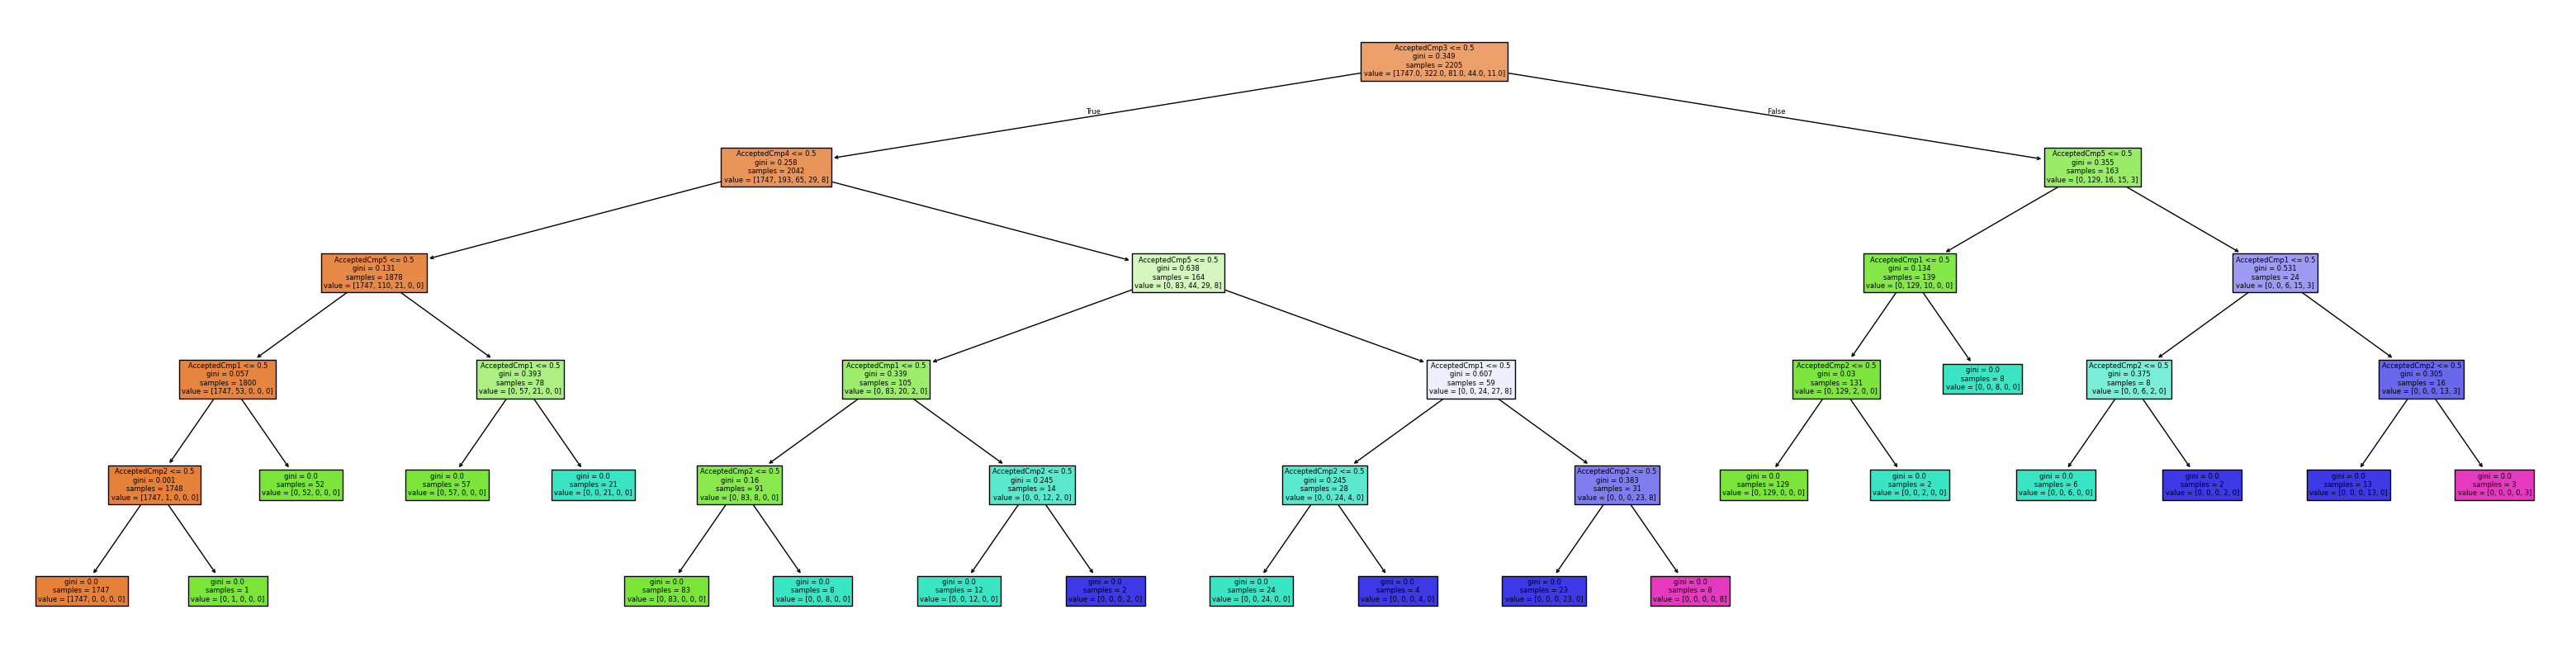

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train the classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(40, 10))
plot_tree(clf, filled=True, feature_names=list(X.columns))
plt.show()

**KNN Model**

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
sales_data = pd.read_csv('sales_data.csv')

# Prepare the data
features = sales_data.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
    'AcceptedCmpOverall'])
target = sales_data['AcceptedCmpOverall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)

# Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

# Model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.783987915407855
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       525
           1       0.33      0.13      0.19        97
           2       0.33      0.17      0.22        24
           3       0.00      0.00      0.00        13
           4       1.00      0.33      0.50         3

    accuracy                           0.78       662
   macro avg       0.50      0.32      0.36       662
weighted avg       0.72      0.78      0.74       662



In [21]:
from sklearn.model_selection import GridSearchCV

# Tune hyperparameters
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_neighbors': 21, 'p': 1, 'weights': 'distance'}


In [22]:
# Retrain the model with the optimal parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=21, p=1, weights='distance')

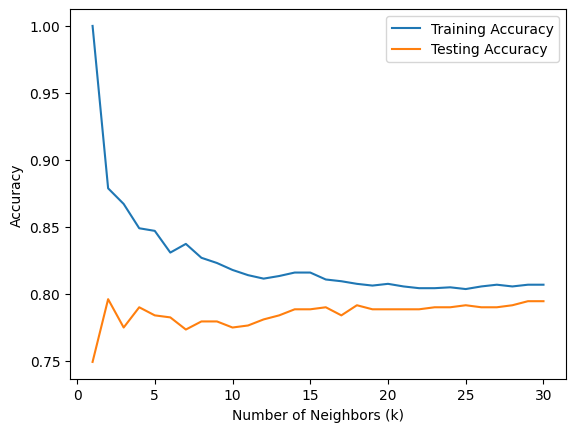

In [23]:
# Visualization of the results
k_values = range(1, 31)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_accuracies.append(knn.score(X_train_scaled, y_train))
    test_accuracies.append(knn.score(X_test_scaled, y_test))

plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
# Input new data into the model for prediction
new_data = pd.read_csv('sales_data_new.csv')
new_data_scaled = scaler.transform(new_data)

predictions = best_knn.predict(new_data_scaled)

In [36]:
# Label customers with 'yes' under 'NextCampaignTarget' if they have a 'PredictedAcceptance' >= 3
# Output the prediction into a csv file
new_data['PredictedAcceptance'] = predictions
new_data['NextCampaignTarget'] = ['yes' if pred >= 3 else 'no' for pred in predictions]
output_result = '/Users/mac/Desktop/DATA 110/Final Project/F24_DATA110/Project/F1/prediction_results.csv'
new_data.to_csv(output_result, index=False)

output_result

'/Users/mac/Desktop/DATA 110/Final Project/F24_DATA110/Project/F1/prediction_results.csv'

In [37]:
prediction_value = pd.read_csv('prediction_results.csv')
prediction_value

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,MntRegularProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,PredictedAcceptance,NextCampaignTarget
0,6,10,7,4,15,40,48,2,0,3,0,0,12,0,no
1,38,0,19,4,0,5,58,46,0,0,4,0,7,0,no
2,736,37,179,51,19,32,1032,999,0,13,0,11,3,0,no
3,1224,29,137,4,17,167,1403,1234,5,7,6,5,5,1,no
4,38,4,15,5,2,9,63,62,1,3,0,3,8,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,407,0,591,150,20,23,1169,1147,0,1,0,3,3,0,no
996,71,7,40,5,0,68,119,47,7,2,0,1,5,0,no
997,15,0,9,0,2,17,29,10,3,1,0,0,7,0,no
998,354,33,314,90,120,91,920,825,4,6,0,16,8,0,no
